In [1]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('clustering_result.pkl', 'rb') as f:
    df = pickle.load(f)
df

,Date,Name,Score,Review,like,re_review,tagged_review,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[0.4333769, 0.04470847, 0.30764776, -1.0062209...",3
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-1.4752162, -0.027740644, 0.8414932, -0.60140...",1
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.18291803, -0.6451806, -1.1281558, -0.45331...",0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.22500041, -0.2376283, 0.022312494, 0.13332...",3
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[-0.61094177, -1.5320773, -0.14728515, 0.03671...",1
...,...,...,...,...,...,...,...,...,...
3486,2018년 3월 1일,이회용,5,디자인 너무 이뻐요. 단순해서 더 좋구요,0,디자인 너무 이뻐요. 단순해서 더 좋구요,"[디자인, 이쁘다, 단순하다, 좋다]","[0.072876245, -0.10836106, 0.16435876, 0.22672...",2
3487,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[0.12740642, 0.053974167, -0.2656459, -0.17448...",0
3488,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,어플이 더위먹었나? 잘되다가 안되네...,"[어플, 더위, 먹다, 안되다]","[-0.00160677, -0.05567416, -0.004090037, 0.044...",0
3489,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,짱!! 밖에 나가도 되니까 진짜 좋아요!,"[짱, 나가다, 좋다]","[-0.11295778, -0.21367322, -0.292919, 0.201491...",2


# ◆ 1. LDA를 위한 데이터 전처리
* 1.1. 전체 단어의 사전 만들고 각 문서에 매칭하기
    > 단어들이 문서에 얼마나 위치해 있는지 분포를 파악해야하기 때문에 분석할 전체 데이터 대상으로
    사용된 단어의 사전을 생성해야한다,


In [3]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

### 1.1 전체 단어의 사전 만들고 각 문서에 매칭하기

In [4]:
df_cluster0 = df[df['cluster']==0]
df_cluster0.head()

,Date,Name,Score,Review,like,re_review,tagged_review,vector,cluster
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.18291803, -0.6451806, -1.1281558, -0.45331...",0
7,2020년 1월 17일,Jihee Yoo,1,에어컨이랑 겨우겨우 연결됐는데 제품이 존재하지않는다고 다시 연결하라는 메세지 떠서 ...,1,에어컨이랑 겨우겨우 연결됐는데 제품이 존재하지않는다고 다시 연결하라는 메세지 떠서 ...,"[에어컨, 연결, 돼다, 제품, 존재, 않다, 다시, 연결하다, 메세지, 뜨다, 다...","[0.5247286, -0.06676769, -0.15694782, -0.25934...",0
8,2020년 1월 20일,haeseong yun,1,안드로이드에서 다음 버튼이 없음 등록에서 다음 단계로 자체가 안넘어감 한달 넘음 아...,0,안드로이드에서 다음 버튼이 없음 등록에서 다음 단계로 자체가 안넘어감 한달 넘음 아...,"[안드로이드, 버튼, 없다, 등록, 단계, 자체, 넘어가다, 달, 넘다, 아이폰, ...","[0.90578043, -0.7998167, -0.4436966, 0.4475700...",0
9,2019년 12월 27일,김춘구,2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,1,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,"[샤오미, 비교, 해보다, 기능, 한참, 부족하다, 공기청정기, 예약, 기능, 단순...","[-0.55097556, -1.034116, -0.5265064, 0.3682292...",0
14,2020년 1월 9일,MS K,1,연결도 안되고 제품 네트워크변경도 안되고 앱 업데이트 하더니 이따위로 만들어놨네요....,0,연결도 안되고 제품 네트워크변경도 안되고 앱 업데이트 하더니 이따위로 만들어놨네요....,"[연결, 안되다, 제품, 네트워크, 변경, 안되다, 앱, 업데이트, 만들다, 네트워...","[0.26839295, 0.4265918, -0.28929678, 0.4401439...",0


In [5]:
all_documents = list(df_cluster0['tagged_review'])
dictionary = Dictionary(all_documents)
dictionary.token2id

{'건': 0,
 '걸리다': 1,
 '골': 2,
 '공기청정기': 3,
 '김치냉장고': 4,
 '끊기다': 5,
 '네비게이션': 6,
 '노티': 7,
 '누르다': 8,
 '더욱': 9,
 '돼다': 10,
 '들어가다': 11,
 '때리다': 12,
 '뜨다': 13,
 '문제': 14,
 '방법': 15,
 '부부': 16,
 '불가능': 17,
 '비': 18,
 '살다': 19,
 '상단': 20,
 '서버': 21,
 '세이': 22,
 '션': 23,
 '신혼': 24,
 '실행': 25,
 '쓰다': 26,
 '안되다': 27,
 '않다': 28,
 '알다': 29,
 '알림': 30,
 '앱': 31,
 '연결': 32,
 '연동': 33,
 '영역': 34,
 '위례': 35,
 '자고': 36,
 '자다': 37,
 '자체': 38,
 '전화기': 39,
 '접속': 40,
 '접수': 41,
 '종료': 42,
 '중': 43,
 '큐': 44,
 '팝업': 45,
 '해결': 46,
 '가전': 47,
 '걸이': 48,
 '그대로': 49,
 '기다': 50,
 '다시': 51,
 '달': 52,
 '메세지': 53,
 '벽': 54,
 '빠르다': 55,
 '사라지다': 56,
 '순': 57,
 '쉬다': 58,
 '스탠드': 59,
 '없다': 60,
 '에어컨': 61,
 '연결하다': 62,
 '정보': 63,
 '제품': 64,
 '존재': 65,
 '주고받다': 66,
 '집안': 67,
 '청': 68,
 '추가': 69,
 '타': 70,
 '개선': 71,
 '관리': 72,
 '내': 73,
 '넘다': 74,
 '넘어가다': 75,
 '놈': 76,
 '놓다': 77,
 '다시다': 78,
 '단계': 79,
 '답변': 80,
 '등록': 81,
 '목': 82,
 '문의': 83,
 '버튼': 84,
 '사다': 85,
 '삼성': 86,
 '아이폰': 87,
 '아지': 88,
 '안드로이드': 89,

In [6]:
corpus = []

for doc in all_documents:
    corpus.append(dictionary.doc2bow(doc))

corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 4),
 (26, 1),
 (27, 3),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 4),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1)]

# ◆ 2. LDA모델 만들기
* 2.1 LDA 기본 모델 만들기
* 2.2 LDA 토픽개수 선정
* 2.3 선정한 토픽 개수로 Action 넘버 매칭

### 2.1 LDA 기본 모델 만들기

In [7]:
#3개의 토픽을 갖도록 LDA Modeling

topic_num =  3

ldamodel =  gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = topic_num,
                                            id2word=dictionary,
                                            passes=20,
                                            iterations=50,
                                            random_state=42
                                            )

In [8]:
ldamodel.print_topics(num_words=5)

[(0, '0.040*"등록" + 0.035*"안되다" + 0.027*"제품" + 0.019*"연결" + 0.015*"사용"'),
 (1, '0.037*"안되다" + 0.035*"앱" + 0.028*"연결" + 0.014*"뜨다" + 0.013*"실행"'),
 (2, '0.032*"연결" + 0.021*"없다" + 0.021*"안되다" + 0.019*"에어컨" + 0.012*"서버"')]

In [11]:
#다큐먼트별로 토픽의 분포 확인
for i in range(0,21):
    print(ldamodel.get_document_topics(corpus[i]))

[(1, 0.98723185)]
[(0, 0.55555665), (2, 0.43445057)]
[(0, 0.21565989), (1, 0.010992505), (2, 0.7733476)]
[(0, 0.7568741), (2, 0.23409727)]
[(0, 0.27996427), (1, 0.35343832), (2, 0.36659738)]
[(0, 0.010079509), (1, 0.0107832085), (2, 0.97913724)]
[(0, 0.5291503), (1, 0.45473462), (2, 0.016115088)]
[(0, 0.5445139), (1, 0.4387874), (2, 0.016698698)]
[(0, 0.96257573), (1, 0.018444695), (2, 0.018979581)]
[(0, 0.6658507), (1, 0.31446987), (2, 0.019679379)]
[(0, 0.019364828), (1, 0.019924894), (2, 0.9607102)]
[(0, 0.09629442), (1, 0.015060856), (2, 0.88864475)]
[(0, 0.017180594), (1, 0.013416145), (2, 0.96940327)]
[(0, 0.2985011), (1, 0.027525676), (2, 0.67397326)]
[(0, 0.015616344), (1, 0.014155727), (2, 0.9702279)]
[(0, 0.7825164), (1, 0.025782846), (2, 0.19170076)]
[(0, 0.4278136), (1, 0.5341572), (2, 0.038029205)]
[(0, 0.027988436), (1, 0.9363976), (2, 0.035613928)]
[(0, 0.030540166), (1, 0.026738858), (2, 0.94272095)]
[(0, 0.9577779), (1, 0.02128227), (2, 0.02093975)]
[(0, 0.5197555), (1

### 2.2 LDA 토픽 수 선정
* cohearence & perplexcity

In [12]:
from gensim.models import CoherenceModel #coherence 모델 라이브러리
import matplotlib.pyplot as plt #그래프 그리기
import numpy as np

In [13]:
#perplexity
perplexity_score = ldamodel.log_perplexity(corpus)
perplexity_score

-6.700409500310878

In [14]:
#coherence
top_n = 3

coherence_model = CoherenceModel(model=ldamodel,
                                 texts = all_documents,
                                 dictionary=dictionary,
                                 topn=top_n
                                 )

coherence_score = coherence_model.get_coherence()
coherence_score

0.707341266222782

> 2.2.1 Perplexity 그래프 만들기

In [15]:
perplexity_values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

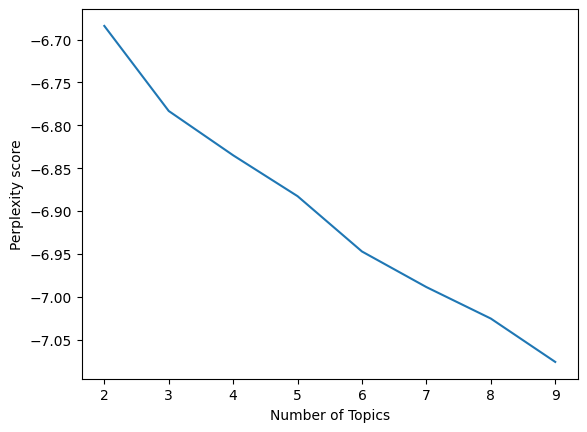

In [16]:
x = range(2,10)

plt.plot(x, perplexity_values)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity score')

In [17]:
coherence_values=[]
top_n = 3

for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel,
                                 texts = all_documents,
                                 dictionary=dictionary,
                                 topn=top_n
                                 )
    coherence_v = coherence_model.get_coherence()
    coherence_values.append(coherence_v)

100%|██████████| 8/8 [01:27<00:00, 10.88s/it]


Text(0, 0.5, 'Coherence Score')

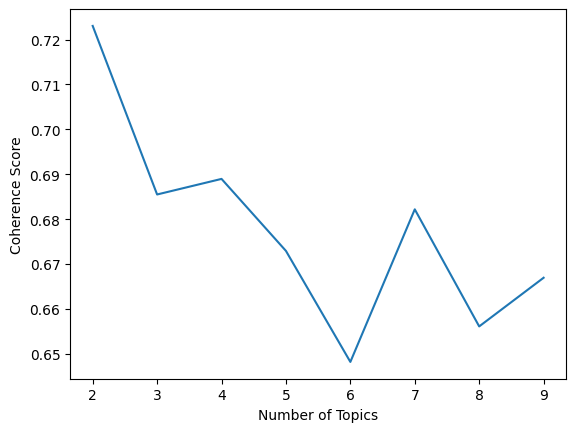

In [18]:
x = range(2,10)

plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

### 2.3 선정한 토픽 개수로 Action 넘버 매칭

In [19]:
topic_num =  3

ldamodel =  gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = topic_num,
                                            id2word=dictionary,
                                            passes=20,
                                            iterations=50,
                                            random_state=42
                                            )

In [20]:
ldamodel.get_document_topics(corpus)[0]

[(1, 0.98723185)]

In [23]:
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label =[]
    value =[]
    for score in doc:
        label.append(score[0])
        value.append(score[1])
    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

100%|██████████| 1635/1635 [00:00<00:00, 6614.80it/s]


In [24]:
action_align[:20]

[1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0]

In [31]:
df_cluster0['action_cluster'] = action_align
df_cluster0

,Date,Name,Score,Review,like,re_review,tagged_review,vector,cluster,action_cluster
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.18291803, -0.6451806, -1.1281558, -0.45331...",0,1
7,2020년 1월 17일,Jihee Yoo,1,에어컨이랑 겨우겨우 연결됐는데 제품이 존재하지않는다고 다시 연결하라는 메세지 떠서 ...,1,에어컨이랑 겨우겨우 연결됐는데 제품이 존재하지않는다고 다시 연결하라는 메세지 떠서 ...,"[에어컨, 연결, 돼다, 제품, 존재, 않다, 다시, 연결하다, 메세지, 뜨다, 다...","[0.5247286, -0.06676769, -0.15694782, -0.25934...",0,0
8,2020년 1월 20일,haeseong yun,1,안드로이드에서 다음 버튼이 없음 등록에서 다음 단계로 자체가 안넘어감 한달 넘음 아...,0,안드로이드에서 다음 버튼이 없음 등록에서 다음 단계로 자체가 안넘어감 한달 넘음 아...,"[안드로이드, 버튼, 없다, 등록, 단계, 자체, 넘어가다, 달, 넘다, 아이폰, ...","[0.90578043, -0.7998167, -0.4436966, 0.4475700...",0,2
9,2019년 12월 27일,김춘구,2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,1,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,"[샤오미, 비교, 해보다, 기능, 한참, 부족하다, 공기청정기, 예약, 기능, 단순...","[-0.55097556, -1.034116, -0.5265064, 0.3682292...",0,0
14,2020년 1월 9일,MS K,1,연결도 안되고 제품 네트워크변경도 안되고 앱 업데이트 하더니 이따위로 만들어놨네요....,0,연결도 안되고 제품 네트워크변경도 안되고 앱 업데이트 하더니 이따위로 만들어놨네요....,"[연결, 안되다, 제품, 네트워크, 변경, 안되다, 앱, 업데이트, 만들다, 네트워...","[0.26839295, 0.4265918, -0.28929678, 0.4401439...",0,2
...,...,...,...,...,...,...,...,...,...,...
3481,2017년 7월 22일,유정아,1,"제품등록도 안되고, 앱자체가 실행이 안됩니다",0,제품등록도 안되고 앱자체가 실행이 안됩니다,"[제품, 등록, 안되다, 앱, 자체, 실행, 안되다]","[0.19922692, -0.052004747, 0.042735755, -0.084...",0,1
3484,2017년 10월 2일,김수아,2,잘쓰고있었는데 제품정보 다날아갔어요,0,잘쓰고있었는데 제품정보 다날아갔어요,"[잘쓰다, 제품, 정보, 날아가다]","[-0.03691264, -0.15006898, -0.08895741, 0.2659...",0,0
3487,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[0.12740642, 0.053974167, -0.2656459, -0.17448...",0,1
3488,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,어플이 더위먹었나? 잘되다가 안되네...,"[어플, 더위, 먹다, 안되다]","[-0.00160677, -0.05567416, -0.004090037, 0.044...",0,1


In [32]:
df_cluster0['action_cluster'].value_counts()

action_cluster
0    633
1    514
2    488
Name: count, dtype: int64

# ◆ 3. LDA 시각화 (LDAvis)


In [28]:
pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 16.7 MB/s  0:00:00

   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- 

In [29]:
#경고무시
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#LDA 시각화 라이브러리
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [30]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)

pyLDAvis.save_html(prepared_data, 'ldavis_cluster0.html')

pyLDAvis.display(prepared_data)

# ◆ 4. LDA 분석을 위한 후작업
* LDAvis와 LDA모델의 토픽 넘버 매칭
* LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭해야한다.

In [34]:
topics=ldamodel.show_topics(num_topics=-1, formatted=True)

for topic_id, topic_desc in topics:
    print(f"Topic ID : {topic_id}, Description : {topic_desc}")

Topic ID : 0, Description : 0.040*"등록" + 0.035*"안되다" + 0.027*"제품" + 0.019*"연결" + 0.015*"사용" + 0.013*"어플" + 0.011*"기능" + 0.011*"와이파이" + 0.011*"좋다" + 0.010*"업데이트"
Topic ID : 1, Description : 0.037*"안되다" + 0.035*"앱" + 0.028*"연결" + 0.014*"뜨다" + 0.013*"실행" + 0.013*"계속" + 0.013*"업데이트" + 0.010*"로그인" + 0.010*"만들다" + 0.010*"다시"
Topic ID : 2, Description : 0.032*"연결" + 0.021*"없다" + 0.021*"안되다" + 0.019*"에어컨" + 0.012*"서버" + 0.011*"와이파이" + 0.010*"좋다" + 0.010*"건조기" + 0.010*"않다" + 0.010*"어플"


In [35]:
new_action_topic =[]

for i in tqdm(df_cluster0.action_cluster):
    if i ==0:
        n=1
    elif i ==1:
        n=2
    else:
        n=3
    new_action_topic.append(n)

100%|██████████| 1635/1635 [00:00<00:00, 627705.91it/s]


In [37]:
df_cluster0.action_cluster = new_action_topic
df_cluster0.action_cluster.value_counts()

action_cluster
1    633
2    514
3    488
Name: count, dtype: int64

In [38]:
df_cluster0.to_csv('Cluster0.csv', encoding='utf-8-sig')

In [39]:
with open('Cluster0.pkl','wb') as f:
    pickle.dump(df_cluster0, f)